# Neural Network Analysis

# 1. Prepare data

In [1]:
#basics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import mode
import base64
import io
import os
import requests
import time

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, recall_score

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential

In [2]:
# Columns to be considered in the dataset
columns = ["LB", "AC", "FM", "UC", "DL", "DP", 
           "ASTV", "MSTV", "ALTV", "MLTV", "Width", "Min", 
           "Max", "Nmax", "Nzeros", "Mode", "Mean", "Median", "Variance", "Tendency"]

path = "../data/"

## Clean data

In [3]:
filename = "prep_data.csv"

df = pd.read_csv(path+filename)
df = df.reindex(np.random.permutation(df.index))

#Prepare X and y
X = df[columns]
y = df["NSP"]

#One-hot enconding of target values 
y_cat = utils.to_categorical(y-1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, train_size=0.8,random_state=45)

## Raw data

In [4]:
filename = "CTG.xls"

df_raw = pd.read_excel(path+filename, sheet_name = "Data",header=1)
df_raw = df_raw.reindex(np.random.permutation(df_raw.index))

#Prepare X and y
X_raw = df_raw[columns]
y_raw = df_raw["NSP"]

#One-hot enconding of target values 
y_cat_raw = utils.to_categorical(y_raw-1)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_cat_raw, train_size=0.8,random_state=45)

# 2. Neural Network 

In [12]:
def evaluate(y_pred, y_test, model_trace):
    
    # Apply argmax
    y_pred = np.argmax(y_pred,axis=1)
    y_compare = np.argmax(y_test,axis=1)
    
    print("Accuracy: %.2f"%accuracy_score(y_pred,y_compare))
    print("Recall: %.2f"%recall_score(y_pred,y_compare,average="macro"))

    cm = confusion_matrix(y_compare, y_pred, normalize="all")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["1","2","3"])
    disp.plot()
    
    
    # Plot the loss function
    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.plot(np.sqrt(model_trace.history['loss']), 'r', label='train')
    ax.plot(np.sqrt(model_trace.history['val_loss']), 'b' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=10)
    ax.set_ylabel(r'Loss', fontsize=10)
    ax.legend()
    ax.tick_params(labelsize=10)

    
    # Plot the accuracy
    fig, ax = plt.subplots(1, 1, figsize=(3,3))
    ax.plot(np.sqrt(model_trace.history['accuracy']), 'r', label='train')
    ax.plot(np.sqrt(model_trace.history['val_accuracy']), 'b' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=10)
    ax.set_ylabel(r'Accuracy', fontsize=10)
    ax.legend()
    ax.tick_params(labelsize=10)

# 3. Change activation function

## 3.1. HL(15 nodes, sigmoid)

In [18]:
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='sigmoid')) # Hidden 1
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 15)                315       
                                                                 
 dense_11 (Dense)            (None, 3)                 48        
                                                                 
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


31/31 [==============================] - 0s 2ms/step
Accuracy: 0.91
Recall: 0.92


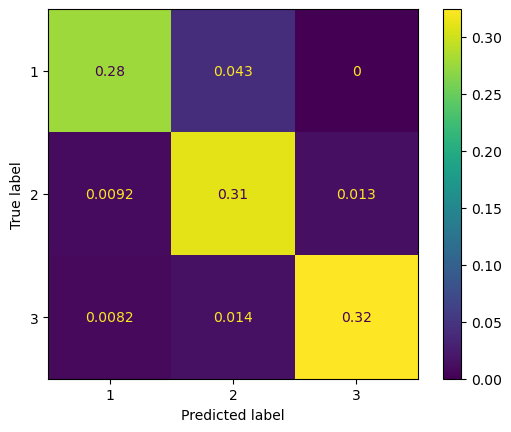

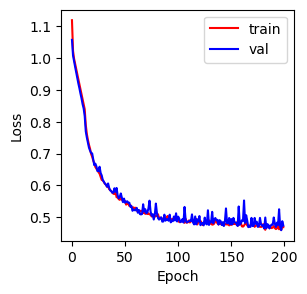

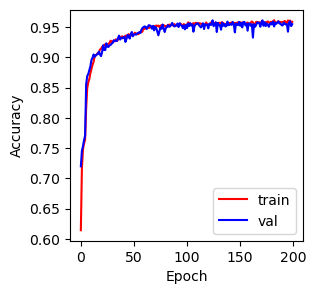

In [19]:
model_trace = model.fit(X_train,y_train,verbose=0,epochs=200, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
evaluate(y_pred, y_test, model_trace)

## 3.2. HL(15 nodes, ReLu)

In [20]:
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                315       
                                                                 
 dense_13 (Dense)            (None, 3)                 48        
                                                                 
Total params: 363
Trainable params: 363
Non-trainable params: 0
_________________________________________________________________


31/31 [==============================] - 0s 2ms/step
Accuracy: 0.89
Recall: 0.89


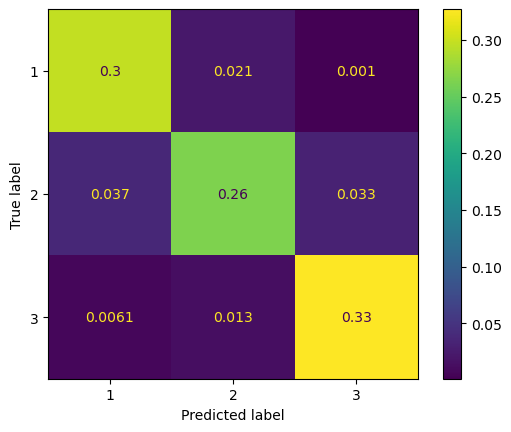

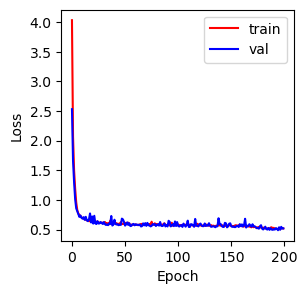

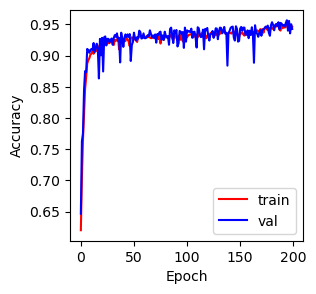

In [21]:
model_trace = model.fit(X_train,y_train,verbose=0,epochs=200,  validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
evaluate(y_pred, y_test, model_trace)

 # 4. Increase hidden nodes

## 4.1. HL(30 nodes, sigmoid, epochs=200)

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='sigmoid')) # Hidden 1
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

In [ ]:
model_trace = model.fit(X_train,y_train,verbose=0,epochs=200)
y_pred = model.predict(X_test)
evaluate(y_pred, y_test, model_trace)

## 4.2. HL(30 nodes, ReLu, epochs=100)

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
y_pred = model.predict(X_test)
evaluate(y_pred, y_test, model_trace)


## 4.3. HL(60 nodes, sigmoid)

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='sigmoid')) # Hidden 1
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given
model_trace = model.fit(X_train,y_train, verbose=0,epochs=200)
y_pred = model.predict(X_test)
evaluate(y_pred, y_test, model_trace)


## 4.4. HL(60 nodes, ReLu)

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

# 5 Increase layers

## 5.1. HL(15nodes, relu) x 2

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(15, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)



## 5.2. HL(15nodes, relu)

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)


## 5.2. HL(15nodes, relu) x 4

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

## 5.4. HL(30/15 nodes, relu) x 2

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(15, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)


## 5.5. HL(60/50/40/30 nodes, relu) x 4 

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

## 5.6. HL(100/100/100/100 nodes, relu) x 4

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

## 5.7. HL(200/200/200/200 nodes, relu) x 4

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

## 5.8. HL(100/100/100/100 nodes, relu, epoch=200) x 4

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=200)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

## 5.9. HL(100/100/100/100 nodes, relu, epoch=150) x 4 - BEST ONE

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=150)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

# 6. Dropout

## 6.1. HL(30 nodes, sigmoid, dropout:0.1) 

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.1))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given
model_trace = model.fit(X_train,y_train,verbose=0,epochs=200)
y_pred = model.predict(X_test)
evaluate(y_pred, y_test, model_trace)


## 6.2. HL(30 nodes, sigmoid, dropout:0.5) 

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.5))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given
model_trace = model.fit(X_train,y_train,verbose=0,epochs=200)
y_pred = model.predict(X_test)
evaluate(y_pred, y_test, model_trace)

## 6.3. BEST MODEL CONFIG. DROPOUT

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.7))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

In [ ]:
model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=100)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')
evaluate(y_pred, y_test, model_trace)

# 7. Best model with best data

In [ ]:
def evaluate_raw(y_pred, y_test):
    
    # Apply argmax
    y_pred = np.argmax(y_pred,axis=1)
    y_compare = y_test - 1
    
    print("Accuracy: %.2f"%accuracy_score(y_pred,y_compare))
    print("Recall: %.2f"%recall_score(y_pred,y_compare,average="macro"))

    cm = confusion_matrix(y_compare, y_pred, normalize="all")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["1","2","3"])
    disp.plot()
    

model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_cat.shape[1], activation='softmax')) # Output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() #note, only works if input shape specified, or Input layer given

start_fit = time.time()
model_trace = model.fit(X_train,y_train, verbose=0,epochs=150)
end_fit = time.time()

start_pred = time.time()
y_pred = model.predict(X_raw)
end_pred = time.time()

time_fit = end_fit - start_fit;
time_pred = end_pred - start_pred; 

print(f'training time:{time_fit}')
print(f'test time:{time_pred}')

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_compare = np.argmax(y_cat_raw,axis=1)

cm = confusion_matrix(y_compare, y_pred, normalize="all")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["1","2","3"])
disp.plot()


In [ ]:
    print("Accuracy: %.2f"%accuracy_score(y_pred,y_compare))
    print("Recall: %.2f"%recall_score(y_pred,y_compare,average="macro"))